**this is a template notebook. To get a 60 you will need to complete the first three chapters. From there is additional points. In the template you'll see text between <> so \<example> where you will have to isert your own text. 
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# <span>Python assignement S4 Regression
## DMS - Regression Assignment (v1.1)
Author: Pim de Groot<br>
Student number: 647945<br>
Date: 20 mei 2022

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* matplotlib
* sklearn
* seaborn
* statsmodels

From these we will need the following libraries:

In [82]:
# Import

try:
    import pandas as pd
    print('Pandas already installed, only imported')
except:
    %pip install pandas
    import pandas as pd
    print('Pandas was not installed, installed and imported')

try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    %pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
      
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')
    
try:
    import seaborn as sns
    print('seaborn already installed, only imported')
except:
    %pip install seaborn
    import seaborn as sns
    print('seaborn was not installed, installed and imported') 

try:
    import statsmodels.api as sm
    print('statsmodels already installed, only imported')
except:
    %pip install statsmodels
    import statsmodels.api as sm
    print('statsmodels was not installed, installed and imported')    

try:
    from sklearn.linear_model import LinearRegression
    print('sklearn already installed, only imported')
except:
    %pip install sklearn
    from sklearn.linear_model import LinearRegression
    print('sklearn was not installed, installed and imported')

from sklearn import metrics

Pandas already installed, only imported
NumPy already installed, only imported
PyPlot already installed, only imported
seaborn already installed, only imported
statsmodels already installed, only imported
sklearn already installed, only imported


# 1. The Data
We are going to use the datafile <span>Life Expectancy Data.csv</span>. This contains data from <span>the GHO data repository under WHO, which keeps track of the health status for all countries </span>.

In [83]:
# Read the file
dataset = pd.read_csv('files/Life Expectancy Data.csv', low_memory=False)


Here's a quick look at the data:

In [84]:
# Code to see the first few row of de datafile
dataset.head()
dataset.info()
# dataset.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2768 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2768 non-null   object 
 1   Year                             2768 non-null   int64  
 2   Status                           2768 non-null   object 
 3   Life expectancy                  2768 non-null   float64
 4   Adult Mortality                  2768 non-null   float64
 5   infant deaths                    2768 non-null   int64  
 6   Alcohol                          2584 non-null   float64
 7   percentage expenditure           2768 non-null   float64
 8   Hepatitis B                      2259 non-null   float64
 9   Measles                          2768 non-null   int64  
 10   BMI                             2736 non-null   float64
 11  under-five deaths                2768 non-null   int64  
 12  Polio               

<AxesSubplot:>

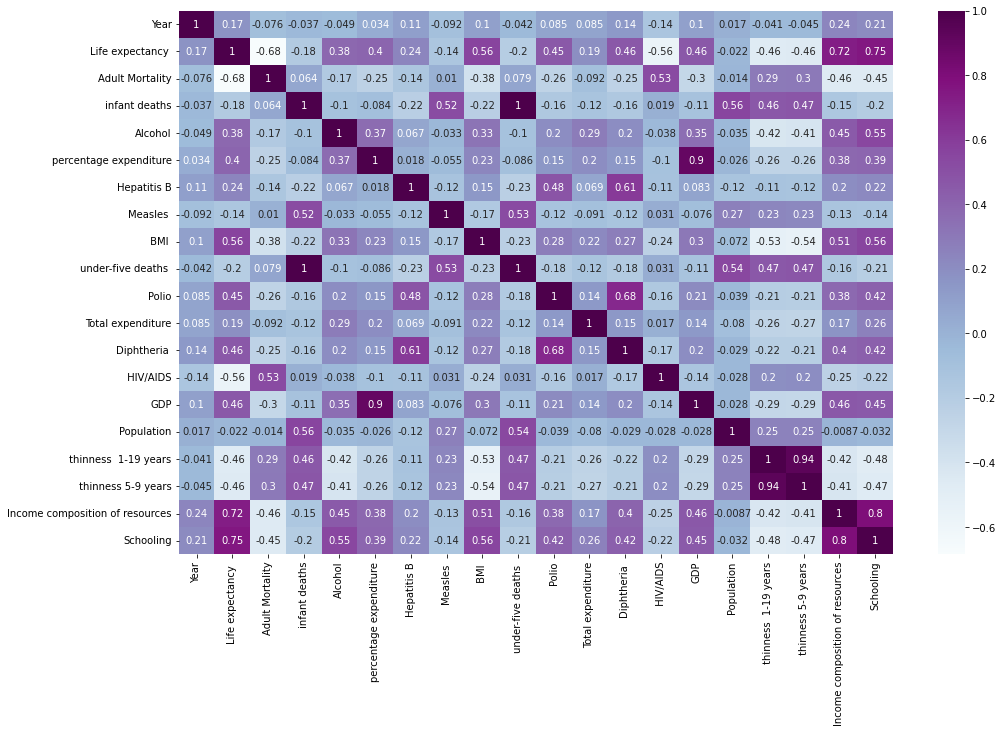

In [85]:
plt.rcParams['figure.figsize']= (16,10)
cor=dataset.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True, cmap="BuPu")

<span style='background:yellow'><explain the variables (/fields/columns) you are going to use for your prediction. The dependent y (the one you are going to predict) and **two** x's (the ones you are going to use to predict that y). What do these variables mean?></span>

*note:* You can score a +.5 point if you don't just pick randomly your variables, but use either a pairplot (a plot showing all scatterplots between all possible pairs of variables), a heatmap, and/or a correlation matrix, to pick some that at least have a reasonable correlation.

# 2. The Bivariate Regression

## 2.1. The First Bivariate Regression

First we are going to look at the predictions using only one of our two x's. 

We start with predicting <span>Schooling</span> using <span >the variable Life expectancy</span>. Below a visualisation of these two:

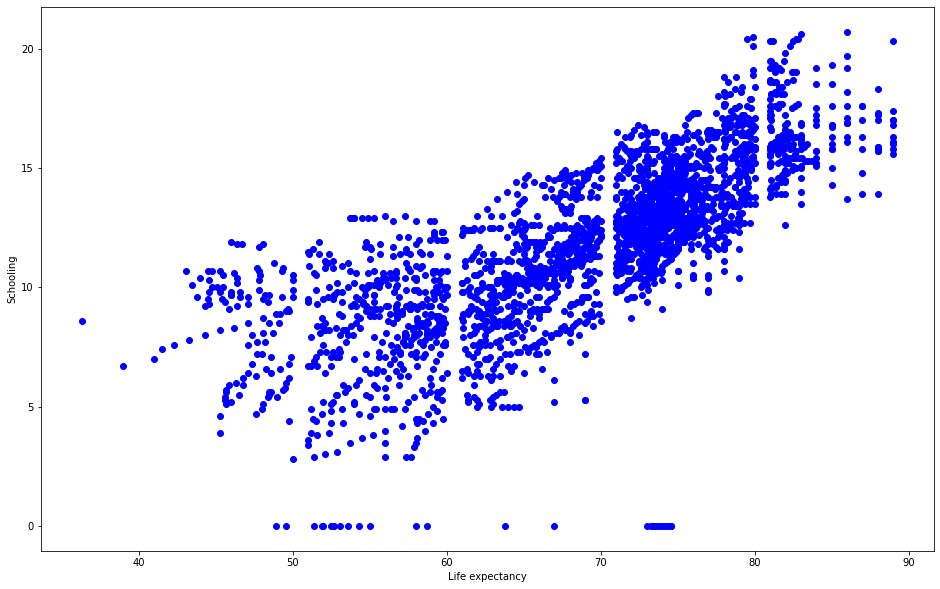

In [92]:
#enter code to show scatterplot

# Clean the date / remove everything with the value NaN
dataset.dropna(subset=["Life expectancy "], inplace=True)
dataset.dropna(subset=["Schooling"], inplace=True)
dataset.dropna(subset=["Income composition of resources"], inplace=True)

dataset = dataset[["Life expectancy ","Income composition of resources", "Schooling"]]

# Retrieve data from dataset
x = dataset['Life expectancy ']
y = dataset['Schooling']

# Show scatterplot
plt.xlabel("Life expectancy")
plt.ylabel("Schooling")

plt.scatter(x, y, c='Blue')
plt.show()


As can be seen from the scatterplot there seems to be a <span style='background:yellow'>\<describe if there is a clear or hardly any, or.... relationship between the two\></span>

Now that we have a visual inspection its time to perform a bivariate regression (twice, once for each x variable). 

We first split the data into training and testing data. We start again with the x of <span style='background:yellow'>\<name of your first x variable></span>:

In [93]:
#add code to create training and testing data

# Start with importing sklearn 
from sklearn.model_selection import train_test_split


In [95]:
# Put datafile into Numpy array
arr = dataset.values

# Reshape values
xRes = arr[:,0].reshape((-1,1))
yRes = arr[:,2].reshape((-1,1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(xRes, yRes, test_size=0.4, random_state=101)


Now setup the linear regression model and fit our training data:

In [96]:
# Create linear regression model and fit it with the training data
model = LinearRegression().fit(X_train, y_train)

# Make prediction using X_test
myPrediction = model.predict(X_test)

Lets see how well the model performed with the training data, by visualisation:

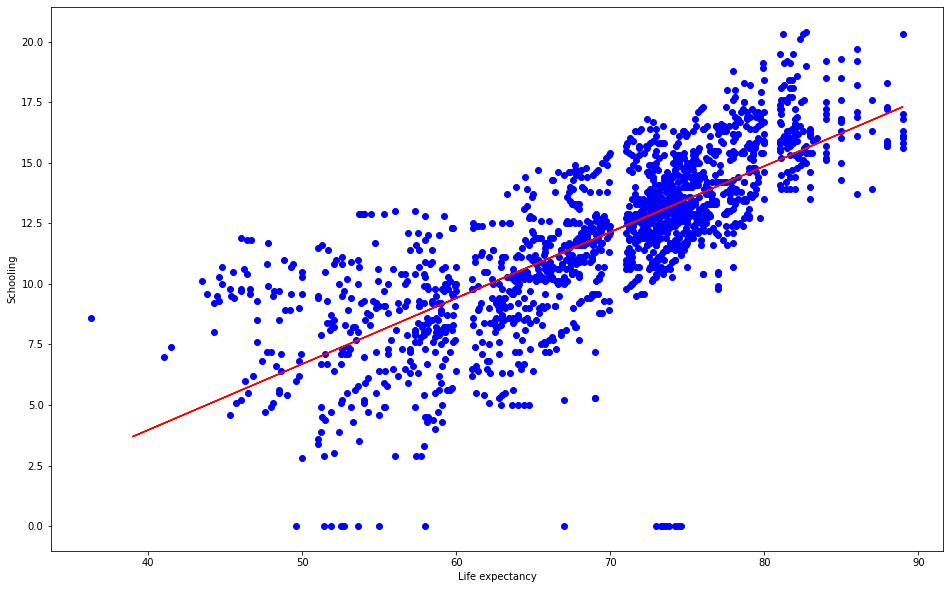

In [97]:
# Show scatterplot with regression line
plt.scatter(X_train, y_train, c='blue')
plt.plot(X_test, myPrediction, c='red')

plt.xlabel("Life expectancy")
plt.ylabel("Schooling")

plt.show()

<span style='background:yellow'>\<describe how well the line describes the data></span>

Besides from a visual, we can also use some metrics.

In [98]:
# Statsmodels.api summary
x = dataset["Life expectancy "]
x = sm.add_constant(x)
y = dataset["Schooling"]

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Schooling   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     3599.
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        13:10:49   Log-Likelihood:                -6117.0
No. Observations:                2768   AIC:                         1.224e+04
Df Residuals:                    2766   BIC:                         1.225e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.6435      0.314    -21.187      0.000      -7.258      -6.029
Life expectancy      0.2688      0.004     59.995      0.000       0.260       0.278
==============================================================================
Omnibus:                      669.897   Durbin-Watson:                   0.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3697.647
Skew:                          -1.033   Prob(JB):                         0.00
Kurtosis:                       8.272   Cond. No.                         523.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='background:yellow'>\<explain in your own words what the R-squared means and indicates, and the two numbers in the column of coef></span>

We can also check how well our model worked by using the testing data:

In [ ]:
#code to show the accuracy score


<span style='background:yellow'>\<explain in your own words what this number means></span>

Now we repeat all these steps, but using the other x-variable: <span style='background:yellow'>/< your other x-variable name /></span>.

## 2.2. The Second Bivariate Regression

In this section we are going to repeat all the steps from the previous one, but now we are going to try to predict <span style='background:yellow'> < your y-variable name > </span>. based on <span style='background:yellow'> <your other x-variable name\>  </span>

Below a visualisation of these two:

In [ ]:
#enter code to show scatterplot


As can be seen from the scatterplot there seems to be a <span style='background:yellow'>\<describe if there is a clear or hardly any, or.... relationship between the two\></span>

Creating again the training/testing sets and the model itself:

In [ ]:
#add code here to split the data and the model itself:


Now lets see how this performs:

In [ ]:
#add code to show both the scatterplot with the regression line, and the model summary results.


<span style='background:yellow'>\<describe the outcome as before, and now also compare the results with the results of section 2.1.></span>

# 3. Multivariate Regression Analysis

In the previous chapter two separate bivariate regression analyses were performed to predict <span style='background:yellow'>\< your y variable name></span> based on <span style='background:yellow'>\<your first x-variable name></span> and <span style='background:yellow'>\<your second x-variable name></span> separately. In this chapter we are going to look if we can make an even better prediction if we try to predict <span style='background:yellow'>\<your y variable name></span> based on BOTH of these together.

We begin with combining the two x's into one X:

In [ ]:
#add code here to add the two x's into one


To actually perform the regression now, we can use the exact same method as before with the bivariate one:

In [ ]:
#code to split the data, and create & fit the model:


A visualisation becomes now more difficult, since it would have to be in 3D. (0.5 bonus if you manage to do this). However, the model summary still works:

In [ ]:
#code to show model summary and accuracy score


Instead of looking at the R-square, we should be looking at the adjusted R-square. <span style='background:yellow'>< explain why></span>.

We also see more rows now in the 'coef' column. <span style='background:yellow'>\<explain why this is></span>.

<span style='background:yellow'>\<explain how this model performs compared to the other two from chapter 2/></span>

A last thing to do would be to check the VIF's:

In [ ]:
#add code here to see the VIF's


<span style='background:yellow'>\<explain what to look for in the results></span>

<font size="5"><center>-----Chapters 1 to 3 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 4. Selecting Input Variables

In chapter 3 we improved on the model to predict <span style='background:yellow'>\<your y-variable name></span> by using two input variables. We can actually add as many input variables as we like. Lets explore this by simply first adding ALL other variables as X.

In [ ]:
#add code to create an X variable using all variables, except of course your y variable:


We could first have a quick look at the results of this model:

In [ ]:
#add code here to model and fit the new X with the y, and show the model summary and accuracy score:


However we have to be careful with those VIF's. So lets see:

In [ ]:
#add code here to show the VIF's.

We need to remove the ones with a VIF higher than 10, but each time we remove one, the VIF's change. Lets create a small Python function that removes the highest VIF each time, until none of them are anymore above 10.

In [ ]:
#add your function code here.


Lets run the function, and then use the result to create a new model:

In [ ]:
#add code here that runs the just made function, and uses the result for the new model:


We might also keep an eye out on that adjusted R-square. Iterate over all possible combinations of input variables we have remaining, and see which combination yields the highest adjusted R-square.

In [ ]:
#add your code here.


Finally lets see how this new model performs:

In [ ]:
#add code here to model and fit the new X with the y, and show the model summary and accuracy score:


<span style='background:yellow'>\<interpret the result, how well is the model now compared to our previous models?></span>

# 5. Another splitting method

To obtain the the test and training data we used the so-called hold-out method. However other methods also exist for this. In this chapter an explanation **and practical example** is given for the \<your splitting method>.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work in principal, how is it different from the hold-out method?. You will need more cells than the ones below!></span>

In [ ]:
#code using your method


<span style='background:yellow'>\<explain the result></span>

# 6. A New Technique

So far, we only used the 'basic' simple linear regression (the bivariate) and multiple linear regression. However, there are many variations, as also seen on the slides. In this chapter the \<your regression method> is explained.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work, what makes it different from the regular linear regression, in which situations might this be optimal. You will need more cells than the ones below></span>

In [ ]:
#code using your method


# 7. Surprise

There is a lot written about regression analysis, and although a lot was discussed during the lecture, that was just a tip of an iceberg. One thing for example that was not mentioned is \<start explaining from here....>

----this chapter is for the 10. It should be something substantial, related to regression and not already discussed----

---examples could be an explanation on the Gradient Descent approach to linear programming, or using Matrix Algebra to obtain the linear regression equation----